# Data Preprocesing

## Data Cleaning

In [2961]:
#import required libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import words
import re

In [2962]:
# read the dataset and store it in a dataframe
file_path = "/Users/makchanna128gmail.com/Documents/GitHub/Job-Vis-2023-2024/Data/2021_2023_data.csv"
dataset = pd.read_csv(file_path)
data_origin = pd.DataFrame(dataset)
data_origin

,Unnamed: 0,jobUrl,job title,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,...,Industry,Qualification,Language,Location,Job Description,Job Requirement,Company Profile,Publish Date,Closing Date,Contact Info
0,0,https://www.camhr.com/a/job/10559094,Assistant Store Manager (Champion-Chip Mong 27...,"Jaspal Fashions (Cambodia) Co., Ltd.",Assistant Store Manager (Champion-Chip Mong 27...,Entry Level,~,~,Negotiable,Male/Female,...,\n General Business Services\n,\n High School\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
1,1,https://www.camhr.com/a/job/10559095,Assistant Store Manager (Lyn Around),"Jaspal Fashions (Cambodia) Co., Ltd.",Assistant Store Manager (Lyn Around),Senior,2,~,Negotiable,Male/Female,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
2,2,https://www.camhr.com/a/job/10559096,Store Manager (LYN Brand-Prince Mall),"Jaspal Fashions (Cambodia) Co., Ltd.",Store Manager (LYN Brand-Prince Mall),Senior,3,~,Negotiable,~,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To act as a role model fo...,• Analysis of management indicators.\n• Custom...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
3,3,https://www.camhr.com/a/job/10559097,Store Manager (Jelly Bunny),"Jaspal Fashions (Cambodia) Co., Ltd.",Store Manager (Jelly Bunny),Senior,3,~,Negotiable,~,...,\n General Business Services\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To act as a role model fo...,• Analysis of management indicators.\n• Custom...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
4,4,https://www.camhr.com/a/job/10559098,"Store Supervisor (CHAMPION, JELLY BUNNY, JASPA...","Jaspal Fashions (Cambodia) Co., Ltd.","Store Supervisor (CHAMPION, JELLY BUNNY, JASPA...",Entry Level,2,~,Negotiable,Male/Female,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,PEOPLE MANAGEMENT\n• To organise and distribut...,• Basic knowledge of the business indicators.\...,"Since starting out in 1947, Jaspal Group has s...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information Mr. Chin Panha N/A kh-hr@...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94621,31,https://www.camhr.com/a/job/10540232,បុគ្គលិកផ្នែករត់តុ Service Staff ($150-$170) ប...,Premium Care Business Consulting,បុគ្គលិកផ្នែករត់តុ Service Staff ($150-$170) ប...,Entry Level,~,3,<$200,Male/Female,...,\n General Business Services\n,\n High School\n,\n English-- Good\n,\n Phnom Penh\n,NaN,NaN,NaN,Publish Date：Dec-31-2022,Closing Date：Jan-03-2023,Contact Information Belly (Mr.) HR Manager 06...
94622,32,https://www.camhr.com/a/job/10540233,Digital Marketing ($300-$350) Near Phsar Depo,Premium Care Business Consulting,Digital Marketing ($300-$350) Near Phsar Depo,Middle,1,3,$200-$500,Male/Female,...,\n General Business Services\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,#NAME?,- 1+ Years of Experience in Digital Marketing-...,NaN,Publish Date：Dec-31-2022,Closing Date：Dec-31-2022,Contact Information Belly (Mr.) HR Manager 06...
94623,33,https://www.camhr.com/a/job/10540234,Sales Manager ($500-$800)(ម៉ូតូ) ក្បែរវត្តសំពៅមាស,Premium Care Business Consulting,Sales Manager ($500-$800)(ម៉ូតូ) ក្បែរវត្ត

In [2963]:
#Read CSV with Dictionary Reader
#with open(file_path, 'r') as csvfile:
   # reader = csv.DictReader(csvfile)
    #for head in reader:
       #print(dict(head))

In [2964]:
# show the columns name of the dataframe
columns = data_origin.columns
columns

Index(['Unnamed: 0', 'jobUrl', 'job title', 'company_name', 'position',
       'Level', 'Year of Exp', 'Hiring', 'Salary', 'Sex', 'Age', 'Term',
       'Function/Category', 'Industry', 'Qualification', 'Language',
       'Location', 'Job Description', 'Job Requirement', 'Company Profile',
       'Publish Date', 'Closing Date', 'Contact Info'],
      dtype='object')

In [2965]:
# Get overall information about the DataFrame
print(data_origin.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94626 entries, 0 to 94625
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94626 non-null  int64 
 1   jobUrl             94626 non-null  object
 2   job title          94626 non-null  object
 3   company_name       94624 non-null  object
 4   position           94626 non-null  object
 5   Level              94626 non-null  object
 6   Year of Exp        94626 non-null  object
 7   Hiring             94626 non-null  object
 8   Salary             94626 non-null  object
 9   Sex                94626 non-null  object
 10  Age                94626 non-null  object
 11  Term               94626 non-null  object
 12  Function/Category  94626 non-null  object
 13  Industry           94626 non-null  object
 14  Qualification      94626 non-null  object
 15  Language           94626 non-null  object
 16  Location           94626 non-null  objec

### Missing Value

In [2966]:

# Define a list of values that should be considered as missing
missing_values = ["NA", "N/A", "--", "null", "NaN","~"]

# Replace the missing values with NaN
data_origin.replace(missing_values, pd.NA, inplace=True)

# Check the DataFrame for missing values
missing_checking = data_origin.isnull().sum()
print(missing_checking)

Unnamed: 0               0
jobUrl                   0
job title                0
company_name             2
position                 0
Level                 8829
Year of Exp          22766
Hiring               15080
Salary                 137
Sex                  21826
Age                      0
Term                     0
Function/Category        0
Industry                 0
Qualification            0
Language                 0
Location                 0
Job Description       9156
Job Requirement       9135
Company Profile      21091
Publish Date             0
Closing Date             0
Contact Info             0
dtype: int64


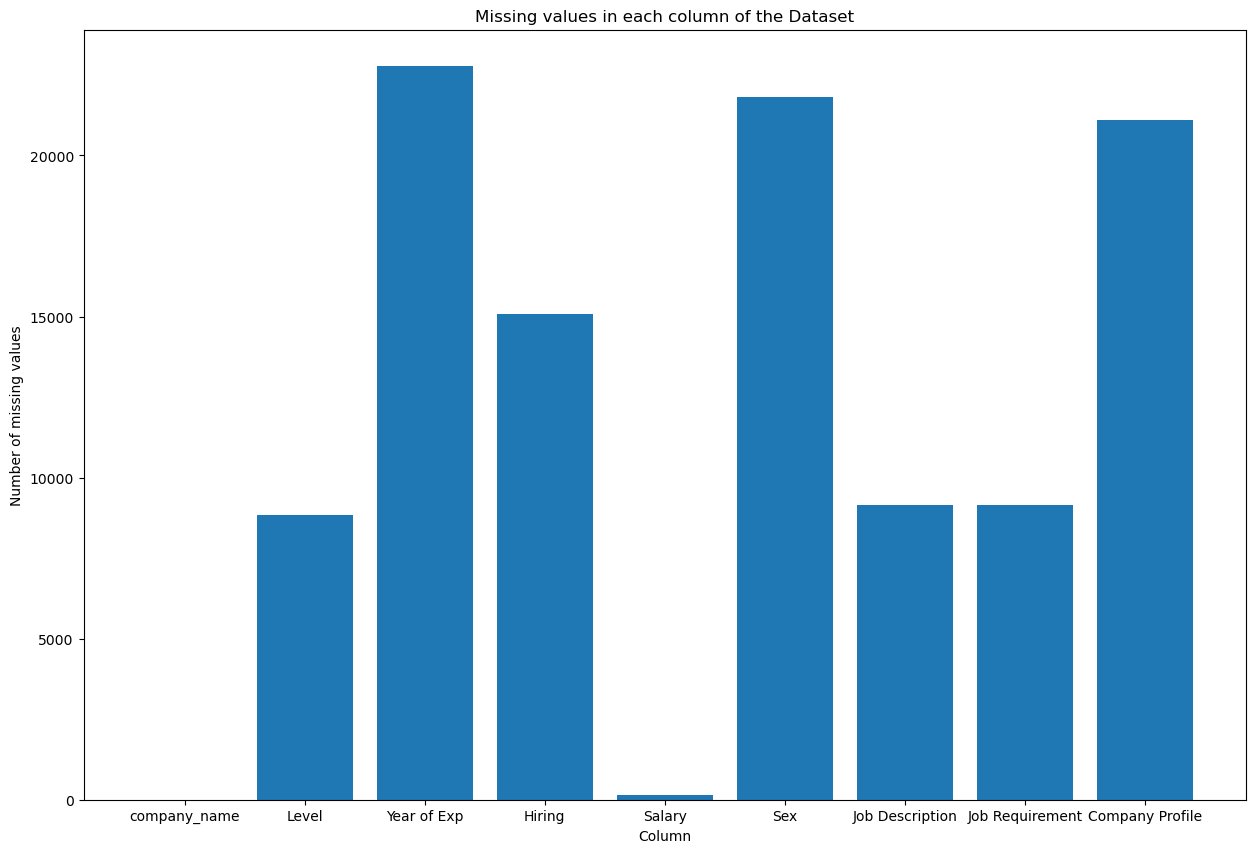

In [2967]:
# Keep only the columns with missing values>0 
missing = missing_checking[missing_checking > 0] 
#Create a bar chart of the missing values
fig = plt.figure(figsize =(15, 10))

plt.bar(missing.index, missing.values)
plt.xlabel("Column")
plt.ylabel("Number of missing values")
plt.title("Missing values in each column of the Dataset")
plt.show()

Calculate Percentage of Missing Value

In [2968]:
# Total number of entries (rows X columns) in the dataset
total= data_origin.size
#Total number of missing values
missing_tot = missing_checking.sum()
# Calculate percentage of missing values
print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values")

The dataset contains 4.96 % missing values


In [2969]:
#Remove Missing Value in our Dataset
new_data = data_origin.dropna()
print(new_data)

       Unnamed: 0                                jobUrl  \
8               8  https://www.camhr.com/a/job/10559102   
12             12  https://www.camhr.com/a/job/10559106   
19             19  https://www.camhr.com/a/job/10559113   
23             23  https://www.camhr.com/a/job/10559117   
32             32  https://www.camhr.com/a/job/10559126   
...           ...                                   ...   
94592           2  https://www.camhr.com/a/job/10540203   
94593           3  https://www.camhr.com/a/job/10540204   
94603          13  https://www.camhr.com/a/job/10540214   
94604          14  https://www.camhr.com/a/job/10540215   
94614          24  https://www.camhr.com/a/job/10540225   

                                               job title  \
8                                  Sale Depot Supervisor   
12                                      Graphic Designer   
19                                    Compliance Manager   
23      Manager, Tour Leader & Event (Expat - Malay

In [2970]:
# Check the DataFrame for missing values
missing_checking = new_data.isnull().sum()
print(missing_checking)

Unnamed: 0           0
jobUrl               0
job title            0
company_name         0
position             0
Level                0
Year of Exp          0
Hiring               0
Salary               0
Sex                  0
Age                  0
Term                 0
Function/Category    0
Industry             0
Qualification        0
Language             0
Location             0
Job Description      0
Job Requirement      0
Company Profile      0
Publish Date         0
Closing Date         0
Contact Info         0
dtype: int64


### Duplicating Data

In [2971]:
# Create Function to check for duplicate rows
def check_duplicating(input_data):
    duplicates = input_data.duplicated()
    
    # Count the number of duplicate rows
    duplicate_rows = input_data[duplicates]
    num_duplicates = duplicate_rows.shape[0]
    return num_duplicates


In [2972]:
# print to check duplicating row
num_duplicates = check_duplicating(new_data)
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 50


In [2973]:
#Remove duplication
data_unique = new_data.drop_duplicates()

 # print to check duplicating row
num_duplicates = check_duplicating(data_unique)
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [2974]:
display(data_unique)

,Unnamed: 0,jobUrl,job title,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,...,Industry,Qualification,Language,Location,Job Description,Job Requirement,Company Profile,Publish Date,Closing Date,Contact Info
8,8,https://www.camhr.com/a/job/10559102,Sale Depot Supervisor,Y Chhe Group,Sale Depot Supervisor,Middle,3,1,Negotiable,Male/Female,...,\n Architecture/Building/Construction...,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,JOB TITLE: SALE DEPOT SUPERVISORREPORTS TO: ...,1. Bachelor degree of Marketing or related fi...,Founded as a family retail store in Phnom Penh...,Publish Date：May-23-2023,Closing Date：May-24-2023,Contact Information KHIEV Ponleu HR Manager 01...
12,12,https://www.camhr.com/a/job/10559106,Graphic Designer,TH Retail Group,Graphic Designer,Entry Level,2,1,Negotiable,Male/Female,...,\n Wholesale/Retail\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,* Design Poster / Promotion poster and determi...,• Excellent written and verbal communication s...,"Starting from 1951 in Texas, United States, Ci...",Publish Date：May-23-2023,Closing Date：Jun-22-2023,"Contact Information Circle K, Recruitment Team..."
19,19,https://www.camhr.com/a/job/10559113,Compliance Manager,Maritime Specialized Bank Plc,Compliance Manager,Senior,3,1,Negotiable,Male/Female,...,\n Banking & Finance\n,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,-\tDevelop and update legal and regulatory com...,"-\tBachelor/master’s degree in law, business ...",Maritime Specialized Bank Plc is a private dig...,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information HR Department 023 222 169...
23,23,https://www.camhr.com/a/job/10559117,"Manager, Tour Leader & Event (Expat - Malaysian)",World Pop Travel-Tours Group,"Manager, Tour Leader & Event (Expat - Malaysian)",Top,7,1,Negotiable,Male,...,\n Tourism\n,\n Bachelor Degree\n,\n English-- Excellent Chinese-Mandar...,\n Phnom Penh\n,KEY ACCOUNTABILITIES•\tLeads and develops the...,JOB REQUIREMENTSEducation:Bachelor’s degree in...,"World Pop Travel & Tour Co., Ltd, one of the l...",Publish Date：May-23-2023,Closing Date：Jun-02-2023,Contact Information HR Department HR Manager 0...
32,32,https://www.camhr.com/a/job/10559126,Sales Executive (Salary 240$-350$),"C C E T CO.,LTD.",Sales Executive (Salary 240$-350$),Senior,2,4,Negotiable,Male/Female,...,\n General Business Services\n,\n Bachelor Degree\n,\n Chinese-Mandarin-- Good English-- ...,\n Phnom Penh\n,• Manage day to day sales activities. Consiste...,• Bachelor’s Degree in Sales and Marketing or ...,C C E T CO.，LTD. Is a high-tech enterprise int...,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Contact Information HR Department HR Manager 0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94592,2,https://www.camhr.com/a/job/10540203,Dealer Sales Consultant Team Leader (US$ 500.0...,"Sinh Hak Hout Trading Co., Ltd",Dealer Sales Consultant Team Leader (US$ 500.0...,Senior,2,3,$500-$999,Male/Female,...,\n Electronics/Electrical/Mechanical ...,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,o\tAssist Business Development Manager to lead...,"o\tBachelor's degree in business, marketing or...",Sinh Hak Hout is one of the leading home impro...,Publish Date：Dec-31-2022,Closing Date：Jan-30-2023,Contact Information HR Department 096 599 69...
94593,3,https://www.camhr.com/a/job/10540204,Dealer Sales Consultant (Up to US$ 900.00),"Sinh Hak Hout Trading Co., Ltd",Dealer Sales Consultant (Up to US$ 900.00),Middle,2,7,Negotiable,Male/Female,...,\n Electronics/Electrical/Mechanical ...,\n Bachelor Degree\n,\n English-- Good\n,\n Phnom Penh\n,Leadership\n− Assist Dealer Sales Consultant T...,"− Bachelor's degree in business, marketing or ...",Sinh Hak Hout is one of the leading home impro...,Publish Date：Dec-31-2022,Closing Date：Jan-30-2023,Contact Information HR Department 096 599 69...
94603,13,https://www.camhr.com/a/job/10540214,BRAND MANAGER,CAMBREW LTD,BRAND 

In [2975]:
# Convert value in Job title column to array
job_title = np.array(data_unique['job title'])
job_title

array(['Sale Depot Supervisor', 'Graphic Designer', 'Compliance Manager',
       ..., 'BRAND MANAGER', 'Sales Development Manager', 'SALES DEALER'],
      dtype=object)

In [2976]:
# Convert value in Positions column to array
positions = np.array(data_unique['position'])
positions

array(['Sale Depot Supervisor', 'Graphic Designer', 'Compliance Manager',
       ..., 'BRAND MANAGER', 'Sales Development Manager', 'SALES DEALER'],
      dtype=object)

In [2977]:
#checking value of both column
from collections import Counter
Counter(job_title == positions)

Counter({True: 34251})

In [2978]:
# delete the column (Job title) and (Unnamed: 0)
new_data_unique= data_unique.drop(['jobUrl','job title','Unnamed: 0','Job Description','Job Requirement','Company Profile','Contact Info'],axis=1)
print(new_data_unique)

                         company_name  \
8                        Y Chhe Group   
12                    TH Retail Group   
19      Maritime Specialized Bank Plc   
23       World Pop Travel-Tours Group   
32                   C C E T CO.,LTD.   
...                               ...   
94592  Sinh Hak Hout Trading Co., Ltd   
94593  Sinh Hak Hout Trading Co., Ltd   
94603                     CAMBREW LTD   
94604                     CAMBREW LTD   
94614                C C E T CO.,LTD.   

                                                position        Level  \
8                                  Sale Depot Supervisor       Middle   
12                                      Graphic Designer  Entry Level   
19                                    Compliance Manager       Senior   
23      Manager, Tour Leader & Event (Expat - Malaysian)          Top   
32                   Sales Executive  (Salary 240$-350$)       Senior   
...                                                  ...          ...

In [2979]:
# df4 = pd.DataFrame(new_data)
# #df4.to_csv(r'output_newData.csv', index=False)
# display(df4)

## detect only english word

In [2980]:
#downlaod english word 
nltk.download("words")

[nltk_data] Downloading package words to
[nltk_data]     /Users/makchanna128gmail.com/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2981]:

testing = pd.DataFrame(new_data_unique)
for_testing = testing
#for_testing = testing.head(100)

In [2982]:
# def filter_english_nltk_checker(text):
#      english_words = set(words.words())
#      return ' '.join(word for word in text.lower().split() if word in english_words)

def filter_english(text):
    english_words = set(words.words())
    words_in_text = nltk.wordpunct_tokenize(text)
    english_words_in_text = [word.lower() for word in words_in_text if word.lower() in english_words]
    return ' '.join(english_words_in_text)


In [2983]:
# data_column = 'company_name'
# # Apply the function to the TextColumn

# for column in new_data_unique.columns:
#     new_data_unique[column + data_column] = new_data_unique[column].apply(filter_english)

# # Display the result
# print(new_data_unique)

In [2984]:
# # Apply the function to the TextColumn
# eng_detect = new_data_unique.copy()  # Create a full copy
# eng_detect['position'] = eng_detect['position'].apply(filter_english)


# # Display the result
# display(eng_detect)

#//////////////////////////////////////////////////

# Apply the function to the TextColumn
eng_detect = for_testing.copy()  # Create a full copy
eng_detect['position'] = eng_detect['position'].apply(filter_english)


# Display the result
display(eng_detect)

In [ ]:
missing_checking = eng_detect.isnull().sum()
# Check the DataFrame for missing values
print(missing_checking)

company_name         0
position             0
Level                0
Year of Exp          0
Hiring               0
Salary               0
Sex                  0
Age                  0
Term                 0
Function/Category    0
Industry             0
Qualification        0
Language             0
Location             0
Publish Date         0
Closing Date         0
dtype: int64


In [ ]:


def clean_text(column):
    #Cleans text by removing common patterns and inconsistencies.

    patterns_to_remove = [
        r"\(.*\)",  # Remove text within parentheses
        r"\(\)",  # Remove empty parentheses
        r"\b(?:Co|Pte|Ltd|PLC|Plc|INC|Corp|LTD|co|ltd|CO|Limited)\b.*",  # Remove company suffixes
        r"\n",  # Remove newlines
        r"--+",  # Remove multiple hyphens
        r"-",  # Remove single hyphens
        r"~",
        r"\.",  # Remove periods
        r",",  # Remove commas
        r"\b(?:Good|Excellent|Mother Tongue|Fair)\b", # Remove specific words
        
    ]

    cleaned_column = column.str.replace("|".join(patterns_to_remove), "", regex=True).str.strip()
    return cleaned_column



In [ ]:

# Specify columns to clean and their new names concisely:
columns_to_clean = ['company_name', 'Term', 'position', 'Industry', 'Function/Category', 'Qualification', 'Location', 'Language']
new_column_names = ['Company Name', 'Job_Type', 'Position', 'Industry', 'Job_Categories', 'Qualification', 'Location', 'Language']

# Clean and rename columns in a single loop:
for old_name, new_name in zip(columns_to_clean, new_column_names):
    eng_detect[new_name] = clean_text(eng_detect[old_name])
    #del eng_detect[old_name]
 
 


In [ ]:
display(eng_detect)

,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,Age,Term,Function/Category,Industry,Qualification,Language,Location,Publish Date,Closing Date,Company Name,Job_Type,Position,Job_Categories
8,Y Chhe Group,sale depot supervisor,Middle,3,1,Negotiable,Male/Female,25 ~ 40,\n Full Time\n,\n Sales\n,Architecture/Building/Construction,Bachelor Degree,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：May-24-2023,Y Chhe Group,Full Time,sale depot supervisor,Sales
12,TH Retail Group,graphic designer,Entry Level,2,1,Negotiable,Male/Female,25 ~ 35,\n Full Time\n,\n Design\n,Wholesale/Retail,Bachelor Degree,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,TH Retail Group,Full Time,graphic designer,Design
19,Maritime Specialized Bank Plc,compliance manager,Senior,3,1,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Bank/Insurance\n,Banking & Finance,Bachelor Degree,English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,Maritime Specialized Bank,Full Time,compliance manager,Bank/Insurance
23,World Pop Travel-Tours Group,manager tour leader event,Top,7,1,Negotiable,Male,30 ~ 40,\n Full Time\n,\n Travel Agent/Ticket Sales\n,Tourism,Bachelor Degree,English ChineseMandarin,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-02-2023,World Pop TravelTours Group,Full Time,manager tour leader event,Travel Agent/Ticket Sales
32,"C C E T CO.,LTD.",executive salary,Senior,2,4,Negotiable,Male/Female,18 ~ 35,\n Full Time\n,\n Sales\n,General Business Services,Bachelor Degree,ChineseMandarin English,Phnom Penh,Publish Date：May-23-2023,Closing Date：Jun-22-2023,C C E T,Full Time,executive salary,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,"TMVP PACKAGING CO.,LTD",sale supervisor,Middle,3,5,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,Chemical/Plastic/Paper/Petrochemical,Bachelor Degree,English,Phnom Penh,Publish Date：May-25-2023,Closing Date：Jun-08-2023,TMVP PACKAGING,Full Time,sale supervisor,Sales
265,"TMVP PACKAGING CO.,LTD",supervisor,Middle,3,2,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Human Resource\n,Chemical/Plastic/Paper/Petrochemical,Bachelor Degree,English,Phnom Penh,Publish Date：May-25-2023,Closing Date：Jun-08-2023,TMVP PACKAGING,Full Time,supervisor,Human Resource
266,"TMVP PACKAGING CO.,LTD",production supervisor,Middle,1,3,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Management\n,Chemical/Plastic/Paper/Petrochemical,Bachelor Degree,English,Phnom Penh,Publish Date：May-25-2023,Closing Date：Jun-08-2023,TMVP PACKAGING,Full Time,production supervisor,Management
287,Dynamic Pharma Group,specialist medical,Middle,2,2,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,Medical/Pharmaceutical,Bachelor Degree,English,Phnom Penh,Publish Date：May-25-2023,Closing Date：Jun-24-2023,Dynamic Pharma Group,Full Time,specialist medical,Sales


In [ ]:
eng_detect['Publish Date']= eng_detect['Publish Date'].str.replace(r'Publish Date：', '', regex=True)
eng_detect['Closing Date']= eng_detect['Closing Date'].str.replace(r'Closing Date：', '', regex=True)
display(eng_detect)

,company_name,position,Level,Year of Exp,Hiring,Salary,Sex,Age,Term,Function/Category,Industry,Qualification,Language,Location,Publish Date,Closing Date,Company Name,Job_Type,Position,Job_Categories
8,Y Chhe Group,sale depot supervisor,Middle,3,1,Negotiable,Male/Female,25 ~ 40,\n Full Time\n,\n Sales\n,Architecture/Building/Construction,Bachelor Degree,English,Phnom Penh,May-23-2023,May-24-2023,Y Chhe Group,Full Time,sale depot supervisor,Sales
12,TH Retail Group,graphic designer,Entry Level,2,1,Negotiable,Male/Female,25 ~ 35,\n Full Time\n,\n Design\n,Wholesale/Retail,Bachelor Degree,English,Phnom Penh,May-23-2023,Jun-22-2023,TH Retail Group,Full Time,graphic designer,Design
19,Maritime Specialized Bank Plc,compliance manager,Senior,3,1,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Bank/Insurance\n,Banking & Finance,Bachelor Degree,English,Phnom Penh,May-23-2023,Jun-22-2023,Maritime Specialized Bank,Full Time,compliance manager,Bank/Insurance
23,World Pop Travel-Tours Group,manager tour leader event,Top,7,1,Negotiable,Male,30 ~ 40,\n Full Time\n,\n Travel Agent/Ticket Sales\n,Tourism,Bachelor Degree,English ChineseMandarin,Phnom Penh,May-23-2023,Jun-02-2023,World Pop TravelTours Group,Full Time,manager tour leader event,Travel Agent/Ticket Sales
32,"C C E T CO.,LTD.",executive salary,Senior,2,4,Negotiable,Male/Female,18 ~ 35,\n Full Time\n,\n Sales\n,General Business Services,Bachelor Degree,ChineseMandarin English,Phnom Penh,May-23-2023,Jun-22-2023,C C E T,Full Time,executive salary,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,"TMVP PACKAGING CO.,LTD",sale supervisor,Middle,3,5,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,Chemical/Plastic/Paper/Petrochemical,Bachelor Degree,English,Phnom Penh,May-25-2023,Jun-08-2023,TMVP PACKAGING,Full Time,sale supervisor,Sales
265,"TMVP PACKAGING CO.,LTD",supervisor,Middle,3,2,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Human Resource\n,Chemical/Plastic/Paper/Petrochemical,Bachelor Degree,English,Phnom Penh,May-25-2023,Jun-08-2023,TMVP PACKAGING,Full Time,supervisor,Human Resource
266,"TMVP PACKAGING CO.,LTD",production supervisor,Middle,1,3,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Management\n,Chemical/Plastic/Paper/Petrochemical,Bachelor Degree,English,Phnom Penh,May-25-2023,Jun-08-2023,TMVP PACKAGING,Full Time,production supervisor,Management
287,Dynamic Pharma Group,specialist medical,Middle,2,2,Negotiable,Male/Female,Age Unlimited,\n Full Time\n,\n Sales\n,Medical/Pharmaceutical,Bachelor Degree,English,Phnom Penh,May-25-2023,Jun-24-2023,Dynamic Pharma Group,Full Time,specialist medical,Sales


In [ ]:
#Cleaning and Refomating Date of publishing and closing date
# Columns to reformat as datetime:
date_columns = ['Publish Date', 'Closing Date']

# Reformat dates in a single line:
for col in date_columns:
    eng_detect[col] = pd.to_datetime(eng_detect[col], errors='coerce')
eng_detect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 8 to 288
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_name       100 non-null    object        
 1   position           100 non-null    object        
 2   Level              100 non-null    object        
 3   Year of Exp        100 non-null    object        
 4   Hiring             100 non-null    object        
 5   Salary             100 non-null    object        
 6   Sex                100 non-null    object        
 7   Age                100 non-null    object        
 8   Term               100 non-null    object        
 9   Function/Category  100 non-null    object        
 10  Industry           100 non-null    object        
 11  Qualification      100 non-null    object        
 12  Language           100 non-null    object        
 13  Location           100 non-null    object        
 14  Publish Da

In [ ]:
# Display the cleaned data as a table
new_table= eng_detect[['Position','Company Name', 'Level', 'Year of Exp', 'Hiring', 'Salary',
       'Sex', 'Age', 'Job_Type','Industry','Job_Categories','Qualification','Language','Location','Publish Date','Closing Date']]

display(new_table)
# new_table = pd.DataFrame(new_table)


,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
8,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Male/Female,25 ~ 40,Full Time,Architecture/Building/Construction,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
12,graphic designer,TH Retail Group,Entry Level,2,1,Negotiable,Male/Female,25 ~ 35,Full Time,Wholesale/Retail,Design,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
19,compliance manager,Maritime Specialized Bank,Senior,3,1,Negotiable,Male/Female,Age Unlimited,Full Time,Banking & Finance,Bank/Insurance,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-06-22
23,manager tour leader event,World Pop TravelTours Group,Top,7,1,Negotiable,Male,30 ~ 40,Full Time,Tourism,Travel Agent/Ticket Sales,Bachelor Degree,English ChineseMandarin,Phnom Penh,2023-05-23,2023-06-02
32,executive salary,C C E T,Senior,2,4,Negotiable,Male/Female,18 ~ 35,Full Time,General Business Services,Sales,Bachelor Degree,ChineseMandarin English,Phnom Penh,2023-05-23,2023-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,sale supervisor,TMVP PACKAGING,Middle,3,5,Negotiable,Male/Female,Age Unlimited,Full Time,Chemical/Plastic/Paper/Petrochemical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
265,supervisor,TMVP PACKAGING,Middle,3,2,Negotiable,Male/Female,Age Unlimited,Full Time,Chemical/Plastic/Paper/Petrochemical,Human Resource,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
266,production supervisor,TMVP PACKAGING,Middle,1,3,Negotiable,Male/Female,Age Unlimited,Full Time,Chemical/Plastic/Paper/Petrochemical,Management,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
287,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Male/Female,Age Unlimited,Full Time,Medical/Pharmaceutical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24


In [ ]:
#Removing Missing Value in our Dataset
new_table_unique_data = new_table.dropna()
print(new_table_unique_data)

                      Position                 Company Name        Level  \
8        sale depot supervisor                 Y Chhe Group       Middle   
12            graphic designer              TH Retail Group  Entry Level   
19          compliance manager    Maritime Specialized Bank       Senior   
23   manager tour leader event  World Pop TravelTours Group          Top   
32            executive salary                      C C E T       Senior   
..                         ...                          ...          ...   
264            sale supervisor               TMVP PACKAGING       Middle   
265                 supervisor               TMVP PACKAGING       Middle   
266      production supervisor               TMVP PACKAGING       Middle   
287         specialist medical         Dynamic Pharma Group       Middle   
288         specialist medical         Dynamic Pharma Group       Middle   

    Year of Exp Hiring       Salary          Sex            Age   Job_Type  \
8        

In [ ]:
missing_checking = new_table_unique_data.isnull().sum()
# Check the DataFrame for missing values
print(missing_checking)

Position          0
Company Name      0
Level             0
Year of Exp       0
Hiring            0
Salary            0
Sex               0
Age               0
Job_Type          0
Industry          0
Job_Categories    0
Qualification     0
Language          0
Location          0
Publish Date      0
Closing Date      0
dtype: int64


In [ ]:
#create Dataframe
data_to_split = pd.DataFrame(new_table_unique_data)


# Split 'Location' column into a list and and Convert list into multiple rows
data_to_split['Location'] = data_to_split['Location'].str.split('，')
location_split = data_to_split.explode('Location')

# Split 'Language' column into a list and and Convert list into multiple rows
location_split['Age'] = location_split['Age'].str.split('~')
age_split = location_split.explode('Age')

# Split 'Language' column into a list and and Convert list into multiple rows
age_split['Language'] = age_split['Language'].str.split(' ')
language_split = age_split.explode('Language')

# Split 'Language' column into a list and and Convert list into multiple rows
language_split['Industry'] = language_split['Industry'].str.split('/')
industry_split = language_split.explode('Industry')

# Split 'Language' column into a list and and Convert list into multiple rows
industry_split['Job_Categories'] = industry_split['Job_Categories'].str.split('/')
result_split = industry_split.explode('Job_Categories')




In [ ]:

def extract_chinese(text):
    if text == "ChineseMandarin":
        return "Chinese"
    else:
        return text

# Apply the function to the "language" column
result_split['Language'] = result_split['Language'].apply(extract_chinese)

display(result_split)



,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
8,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Male/Female,25,Full Time,Architecture,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
8,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Male/Female,25,Full Time,Building,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
8,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Male/Female,25,Full Time,Construction,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
8,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Male/Female,40,Full Time,Architecture,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
8,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Male/Female,40,Full Time,Building,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,production supervisor,TMVP PACKAGING,Middle,1,3,Negotiable,Male/Female,Age Unlimited,Full Time,Petrochemical,Management,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
287,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Male/Female,Age Unlimited,Full Time,Medical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24
287,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Male/Female,Age Unlimited,Full Time,Pharmaceutical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24
288,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Male/Female,Age Unlimited,Full Time,Medical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24


In [ ]:
# Replace Age Unlimited by Undefined
result_split['Age'].replace('Age Unlimited','Undefined', inplace=True) 

# Replace Male\female by Both
result_split['Sex'].replace('Male/Female','Both', inplace=True)  

#convert data type from object to integer(int 64 dtype) in Hiring and Year of Experience columns
column_names = ['Hiring', 'Year of Exp']
result_split[column_names] = result_split[column_names].apply(pd.to_numeric, errors='raise')
result_of_splitting_text = result_split.reset_index(drop=True)
result_of_splitting_text.info()
display(result_of_splitting_text)
# # check missing value rows
# missing_checking = result_of_splitting_text.isnull().sum()
# print(missing_checking)
# result_of_splitting_text.to_csv(r"/Users/makchanna128gmail.com/Documents/GitHub/Job-Vis-2023-2024/Data_clean_new1.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Position        802 non-null    object        
 1   Company Name    802 non-null    object        
 2   Level           802 non-null    object        
 3   Year of Exp     802 non-null    int64         
 4   Hiring          802 non-null    int64         
 5   Salary          802 non-null    object        
 6   Sex             802 non-null    object        
 7   Age             802 non-null    object        
 8   Job_Type        802 non-null    object        
 9   Industry        802 non-null    object        
 10  Job_Categories  802 non-null    object        
 11  Qualification   802 non-null    object        
 12  Language        802 non-null    object        
 13  Location        802 non-null    object        
 14  Publish Date    802 non-null    datetime64[ns]
 15  Closin

,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,25,Full Time,Architecture,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
1,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,25,Full Time,Building,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
2,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,25,Full Time,Construction,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
3,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,40,Full Time,Architecture,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
4,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,40,Full Time,Building,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,production supervisor,TMVP PACKAGING,Middle,1,3,Negotiable,Both,Undefined,Full Time,Petrochemical,Management,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
798,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Both,Undefined,Full Time,Medical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24
799,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Both,Undefined,Full Time,Pharmaceutical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24
800,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Both,Undefined,Full Time,Medical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24


In [ ]:
# Replace whitespace values with NaN in all string-type columns:
# Handles empty strings
result_of_splitting_text.replace(r'^\s*$', np.nan, regex=True,inplace=True)  
# Handles single spaces
result_of_splitting_text.replace(' ', np.nan,inplace=True) 

# check missing value rows
missing_checking = result_of_splitting_text.isnull().sum()
print(missing_checking)

# print to check duplicating value rows
num_duplicates = check_duplicating(result_of_splitting_text)
print("Number of duplicate rows:", num_duplicates)

Position          16
Company Name       0
Level              0
Year of Exp        0
Hiring             0
Salary             0
Sex                0
Age                0
Job_Type           0
Industry           0
Job_Categories     0
Qualification      0
Language          68
Location           0
Publish Date       0
Closing Date       0
dtype: int64
Number of duplicate rows: 104


In [ ]:
# Clean and transform data
#Remove duplicate and missing value
missing_splitting_text = result_of_splitting_text.dropna()
cleaning_splitting_text = missing_splitting_text.drop_duplicates()

result = cleaning_splitting_text.reset_index(drop=True)

# check missing value rows
missing_checking = result.isnull().sum()
print(missing_checking)

# print to check duplicating value rows
num_duplicates = check_duplicating(cleaning_splitting_text)
print("Number of duplicate rows:", num_duplicates)

display(result)
result.info()

Position          0
Company Name      0
Level             0
Year of Exp       0
Hiring            0
Salary            0
Sex               0
Age               0
Job_Type          0
Industry          0
Job_Categories    0
Qualification     0
Language          0
Location          0
Publish Date      0
Closing Date      0
dtype: int64
Number of duplicate rows: 0


,Position,Company Name,Level,Year of Exp,Hiring,Salary,Sex,Age,Job_Type,Industry,Job_Categories,Qualification,Language,Location,Publish Date,Closing Date
0,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,25,Full Time,Architecture,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
1,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,25,Full Time,Building,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
2,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,25,Full Time,Construction,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
3,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,40,Full Time,Architecture,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
4,sale depot supervisor,Y Chhe Group,Middle,3,1,Negotiable,Both,40,Full Time,Building,Sales,Bachelor Degree,English,Phnom Penh,2023-05-23,2023-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,production supervisor,TMVP PACKAGING,Middle,1,3,Negotiable,Both,Undefined,Full Time,Plastic,Management,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
620,production supervisor,TMVP PACKAGING,Middle,1,3,Negotiable,Both,Undefined,Full Time,Paper,Management,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
621,production supervisor,TMVP PACKAGING,Middle,1,3,Negotiable,Both,Undefined,Full Time,Petrochemical,Management,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-08
622,specialist medical,Dynamic Pharma Group,Middle,2,2,Negotiable,Both,Undefined,Full Time,Medical,Sales,Bachelor Degree,English,Phnom Penh,2023-05-25,2023-06-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Position        624 non-null    object        
 1   Company Name    624 non-null    object        
 2   Level           624 non-null    object        
 3   Year of Exp     624 non-null    int64         
 4   Hiring          624 non-null    int64         
 5   Salary          624 non-null    object        
 6   Sex             624 non-null    object        
 7   Age             624 non-null    object        
 8   Job_Type        624 non-null    object        
 9   Industry        624 non-null    object        
 10  Job_Categories  624 non-null    object        
 11  Qualification   624 non-null    object        
 12  Language        624 non-null    object        
 13  Location        624 non-null    object        
 14  Publish Date    624 non-null    datetime64[ns]
 15  Closin

Export Data clean as CSV file

In [ ]:
#Export as CSV file
result.to_csv(r"/Users/makchanna128gmail.com/Documents/GitHub/Job-Vis-2023-2024/Data_clean_new2.csv", index=False)
result.shape

(624, 16)